# Go Bike Database Analysis
## by Youmna Khaled

## Preliminary Wrangling

> I will be working on analysing the dataset for ford bikes that containes data related to the trip details , that include the customer details, his type and the trip duration info. All trips that are started in Feb 2019

In [328]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [329]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.shape

(183412, 16)

In [330]:
df.head(100)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


In [331]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [332]:
df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

On viewing the description of data above,I have noticed some data types that need to be fixed
Before Fixing them I will have to remove nans in addition to unwanted columns.


In [333]:
#Removing the columns that I dont care about
df.drop(['start_station_id','end_station_id','bike_id','start_station_latitude','start_station_name','end_time','end_station_name','start_station_longitude', 'end_station_latitude', 'end_station_longitude','bike_share_for_all_trip'], axis=1, inplace=True)

#Checking that removal is done successfully
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 5 columns):
duration_sec         183412 non-null int64
start_time           183412 non-null object
user_type            183412 non-null object
member_birth_year    175147 non-null float64
member_gender        175147 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 7.0+ MB


In [334]:
#checking if we need to drop any duplicates
sum(df.duplicated())


0

In [335]:
df=df.dropna()

In [336]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175147 entries, 0 to 183411
Data columns (total 5 columns):
duration_sec         175147 non-null int64
start_time           175147 non-null object
user_type            175147 non-null object
member_birth_year    175147 non-null float64
member_gender        175147 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 8.0+ MB


In [337]:
# Birth Year is Float
# change start and end times to datatime
# change gender to category
df.member_birth_year = df['member_birth_year'].astype(int)
df.start_time = pd.to_datetime(df.start_time)
df.member_gender = df['member_gender'].astype('category')


df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175147 entries, 0 to 183411
Data columns (total 5 columns):
duration_sec         175147 non-null int64
start_time           175147 non-null datetime64[ns]
user_type            175147 non-null object
member_birth_year    175147 non-null int64
member_gender        175147 non-null category
dtypes: category(1), datetime64[ns](1), int64(2), object(1)
memory usage: 6.8+ MB


In [338]:
df['duration_minutes'] = df['duration_sec']/60
df.drop(['duration_sec'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175147 entries, 0 to 183411
Data columns (total 5 columns):
start_time           175147 non-null datetime64[ns]
user_type            175147 non-null object
member_birth_year    175147 non-null int64
member_gender        175147 non-null category
duration_minutes     175147 non-null float64
dtypes: category(1), datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.8+ MB


In [339]:
df['start_year'] = df.start_time.dt.year
# df['start_month'] = df.start_time.dt.month
df['start_weekday'] = df.start_time.dt.weekday 
df['start_hour'] = df.start_time.dt.hour
df.drop(['start_time'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175147 entries, 0 to 183411
Data columns (total 7 columns):
user_type            175147 non-null object
member_birth_year    175147 non-null int64
member_gender        175147 non-null category
duration_minutes     175147 non-null float64
start_year           175147 non-null int64
start_weekday        175147 non-null int64
start_hour           175147 non-null int64
dtypes: category(1), float64(1), int64(4), object(1)
memory usage: 9.5+ MB


In [340]:
## Finding Age of 
df['age'] = df.start_year - df.member_birth_year
df.drop(['member_birth_year'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175147 entries, 0 to 183411
Data columns (total 7 columns):
user_type           175147 non-null object
member_gender       175147 non-null category
duration_minutes    175147 non-null float64
start_year          175147 non-null int64
start_weekday       175147 non-null int64
start_hour          175147 non-null int64
age                 175147 non-null int64
dtypes: category(1), float64(1), int64(4), object(1)
memory usage: 9.5+ MB


In [341]:
df.head()

,user_type,member_gender,duration_minutes,start_year,start_weekday,start_hour,age
0,Customer,Male,869.750000,2019,3,17,35
2,Customer,Male,1030.900000,2019,3,12,47
3,Subscriber,Other,608.166667,2019,3,17,30
4,Subscriber,Male,26.416667,2019,3,23,45
5,Subscriber,Male,29.883333,2019,3,23,60


### What is the structure of your dataset?

> This dataset initially consisted of 183412 ride infromtation from the fordgobike database ,where each record has been recorded using 16 fields.After reviewing the dataset ,dropping some features that we dont care about and restructuring others.We are left with 174952 and 11 columns.

### What is/are the main feature(s) of interest in your dataset?

> I am most interested in the features (gender and age) of users and their relationship with duration as well as the user type and the time of the year.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> User Type,Age,Gender as well as duration are most important in any investigation we are making.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

### Duration Analysis

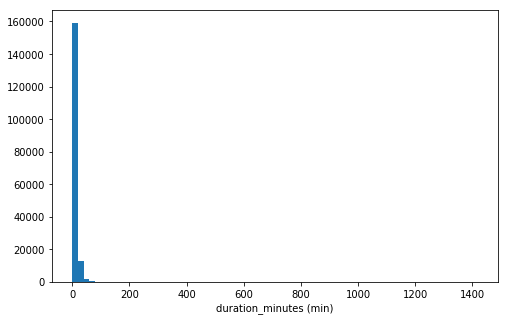

In [342]:
# start with a standard-scaled plot
binsize = 20
bins = np.arange(0, df['duration_minutes'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_minutes', bins = bins)
plt.xlabel('duration_minutes (min)')
plt.show()

As it might be clear from the graph shown above, the duration is condensed in the region between 0 and around 100, but there is also some outliers which made the graph extended that much.

In [343]:
df['duration_minutes'].max()

1409.1333333333334

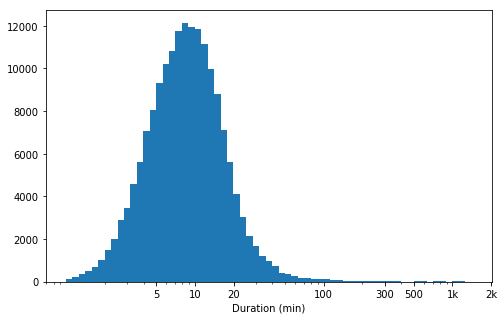

In [344]:
# We better change scale to view a better distribution of data
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.05
bins = 10 ** np.arange(0, np.log10(df['duration_minutes'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_minutes', bins = bins)
plt.xscale('log')
plt.xticks([5,10,20,100,300,500, 1e3, 2e3], [5,10,20,100,300,500, '1k', '2k'])
plt.xlabel('Duration (min)')
plt.show()


It looks like the mean of trip duration is around 10. Most trips are between 5 and 20 mins.There also exists some outliers in the larger range values.

In [345]:
df['duration_minutes'].describe()

count    175147.000000
mean         11.736864
std          27.360139
min           1.016667
25%           5.383333
50%           8.500000
75%          13.150000
max        1409.133333
Name: duration_minutes, dtype: float64

#### Gender Analysis

In [346]:
df['member_gender'].value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

Text(0,0.5,'Percentage')

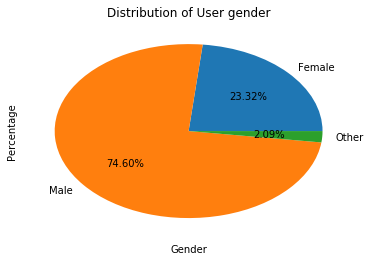

In [367]:
df.groupby('member_gender').size().plot(kind='pie', autopct='%1.2f%%');
plt.title('Distribution of User gender')
plt.xlabel('Gender')
plt.ylabel('Percentage')


> from the distribution showed above, we can see that the datasets is biased as it contains more males than females ,so this should be kept in mind while facts finding

### Age Distrubution

In [368]:
df.age.describe()

count    175147.000000
mean         34.193563
std          10.116689
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: age, dtype: float64

> Max: 144 seems to be an outlier and is kind of illogical.

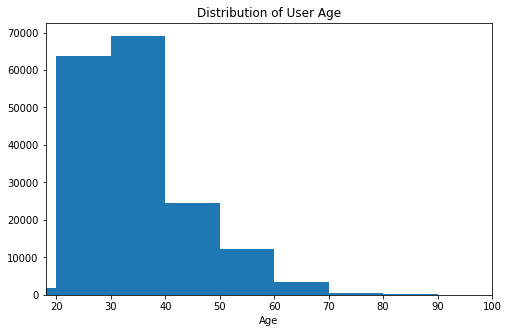

In [349]:
plt.figure(figsize = [8, 5])

binsize = 10
bins = np.arange(0, df['age'].max()+binsize, binsize)

plt.hist(data = df, x = 'age', bins = bins)
plt.xlim(18, 100)
plt.xlabel('Age')
plt.title('Distribution of User Age')
plt.show()

> This datasets ccontains ages from around 18 to 144, but seems to be concenrated around 20 and 40 , with a number between 40 and 70 that is small but can not be neglected.This makes the data skewed more to the right (Youth Group)

Text(0.5,0,'Distrubtion of Age')

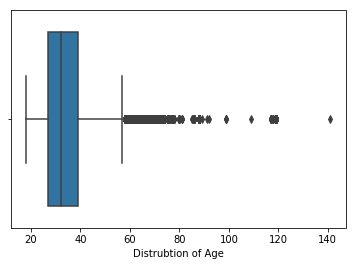

In [350]:
sb.boxplot(data = df, x = 'age')
plt.xlabel('Distrubtion of Age')

> This proves the prescence of outliers in the age groups of the trips.

### User Type Distribution

Text(0,0.5,'')

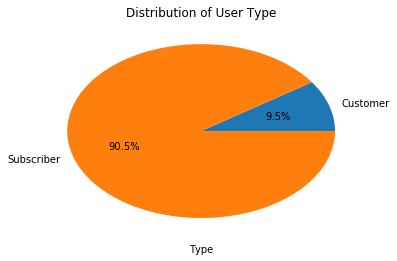

In [351]:
df.groupby('user_type').size().plot(kind='pie', autopct='%1.01f%%');
plt.title('Distribution of User Type')
plt.xlabel('Type')
plt.ylabel('')

In [352]:
df['start_weekday'].value_counts()

3    33733
1    30616
2    28456
4    27682
0    25686
6    14532
5    14442
Name: start_weekday, dtype: int64

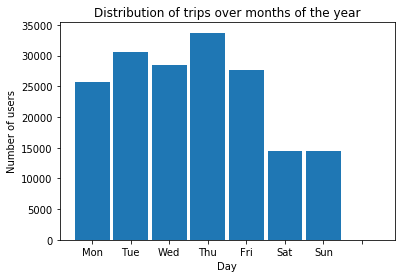

In [353]:
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
bin_edges = np.arange(0, 7.5 + 1, 1)
plt.hist(data = df, x = 'start_weekday', bins = bin_edges, rwidth = 0.9)
plt.xticks(np.arange(0.5, 7 + 1, 1),days)
plt.xlabel('month')
plt.title('Distribution of trips over months of the year')
plt.xlabel('Day')
plt.ylabel('Number of users')
plt.show()



### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Trips are distributed over the weekdays,showing relatively less trips in staurdays and sundays.Most of the users are subscribers not members and the data gender is also skewed showing a much larger men ratio.Another skew has been shown in both the duration of the trips  and the age of the users (skewed towards the youth group).

>> Yes, The distribution of the trip duration has showed a very large set of values and due to the fact that there were outliers, transforming it to log scale has shown a clearer view of the distribution.The mean has been seen to be around 10 from the plot and then has been proved on describing the data.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> In addition to changing of data type to more suitable ones in some cases. I have changed the start time to divide it into smaller groups of dates since I wanted to check the distribution over  the weekdays.In addition, I have changed the birth year to get the age of the user at the time of the trip ( Feb 2019) as this is a feature of interest to me.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Age and Duration


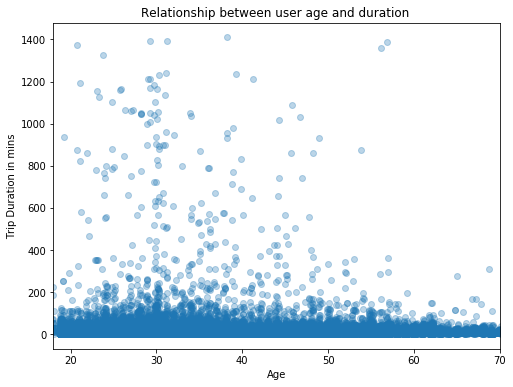

In [354]:
plt.figure(figsize = [8, 6])
sb.regplot(data = df, x = 'age', y = 'duration_minutes',fit_reg=True,x_jitter=0.3,scatter_kws={'alpha':0.3})
plt.xlabel('Age')
plt.xlim(18, 70)
plt.ylabel('Trip Duration in mins')
plt.title('Relationship between user age and duration ')
plt.show()

> The above plot shows that there is weak relationship / correlation between the age and the trip duration. It can be also clearly seen that around the age of 30. theres is higher number of users doing long trips in comparison to larger age groups like the older age groups.

In [355]:
# proof of theory
correlation = df['age']. corr(df['duration_minutes'])
correlation

0.0060267426565002872

### Relationship between duartion and gender


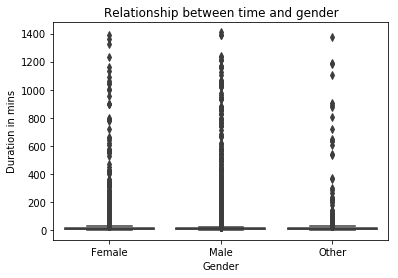

In [356]:
sb.boxplot(data = df,x='member_gender', y='duration_minutes')
plt.title('Relationship between time and gender')
plt.xlabel('Gender')
plt.ylabel('Duration in mins')
plt.show()

>This plot shows that all quartiles are in compressed in the smaller durations and that data includes a lot of points that are counted as outliers.As a result , I am most concerned with smaller ranges.


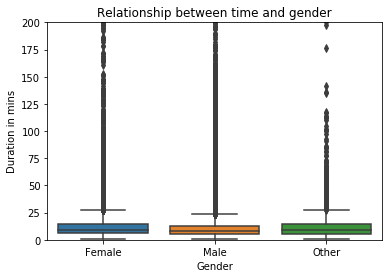

In [357]:
sb.boxplot(data = df,x='member_gender', y='duration_minutes')
plt.title('Relationship between time and gender')
plt.xlabel('Gender')
plt.ylim(0,200)
plt.ylabel('Duration in mins')
plt.show()

> This shows that both females show relatively equal performance in trip duration. I will now check who shows more extreme numbers that others.

### Relationship between duartion and user type


Text(0,0.5,'Number of trips')

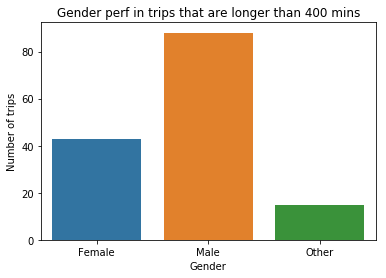

In [369]:

longDurations =df.query('duration_minutes > 400')
sb.countplot(data = longDurations, x = 'member_gender');
plt.title('Gender perf in trips that are longer than 400 mins')
plt.xlabel('Gender')
plt.ylabel('Number of trips')

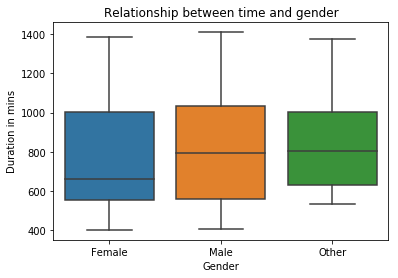

In [370]:
sb.boxplot(data = longDurations,x='member_gender', y='duration_minutes')
plt.title('Relationship between time and gender')
plt.xlabel('Gender')
plt.ylabel('Duration in mins')
plt.show()

> This plot may show that the men do more long trips.knowing thatt this dataset is already biased to men , this might also not be true.To solve this we can bootstrap/sample an equal number of men and women and then check their performance.
> Surprisingly, the bos plot shows that the duration of the female trips are longer even though menn do more long trips.


In [371]:
#proof of theory
print(' Durations: Male , Female',df[df['member_gender']=='Female'].duration_minutes.mean(),df[df['member_gender']=='Male'].duration_minutes.mean())
print('long Durations: Male , Female',longDurations[longDurations['member_gender']=='Female'].duration_minutes.mean(),longDurations[longDurations['member_gender']=='Male'].duration_minutes.mean())


 Durations: Male , Female 12.9845064963 11.2106511495
long Durations: Male , Female 767.013178295 806.702840909


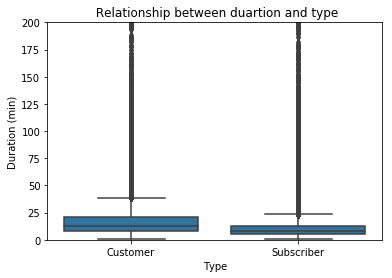

In [372]:

## I will keep the ylimit since I know that this will help me view the data better
sb.boxplot(data=df, x='user_type', y='duration_minutes', color=base_color)
plt.xlabel('Type')
plt.ylim(0,200) 
plt.ylabel('Duration (min)')
plt.title(' Relationship between duartion and type');


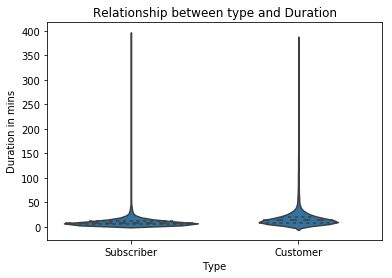

In [374]:
sb.violinplot(data=durations, x='user_type', y='duration_minutes', color=base_color, inner='quartile')
plt.xlabel('Type')
plt.ylabel('Duration in mins')
plt.title('Relationship between type and Duration');
plt.show();

The above two plot show that subsscribers seem to take trips that are on average less than those of customers , this is shown since their avg ,max and means that less than the same values of the custoemr group.

In [375]:
#proof of theory
print(df[df['user_type']=='Customer'].duration_minutes.mean())
print(df[df['user_type']=='Subscriber'].duration_minutes.mean())

21.8335588159
10.6775506363


### Relationship between duartion and day of the trip

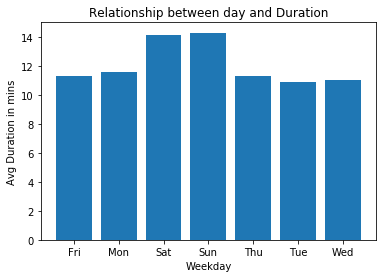

In [376]:
plt.bar(days,df.groupby('start_weekday').duration_minutes.mean());
plt.xlabel('Weekday')
plt.ylabel('Avg Duration in mins')
plt.title('Relationship between day and Duration');


Saturdays and sundays show higher mean value of trip durations than other days.All other days shows relatively equal trip durations.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Duration of the trip is relatively less for larger age groups.Subscribers has shown smaller duration values than customers. In additon, males have , so far , showed more counts in large frequencies,this may and may not be true based on the bias of the dataset.
> It was also seen that saturdays and sundays showed higher trip durations than other weekdays.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> It was kind of surprising that even though the number of mean doing long trips was higher , the average of a long trip of female has been higher than that of males.


## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

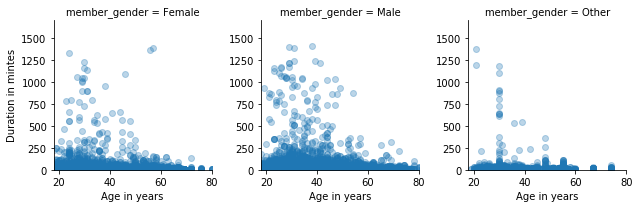

In [377]:
plot = sb.FacetGrid(data = df, col = 'member_gender',xlim = [18, 80], ylim = [0, 1700])
plot.map(plt.scatter, 'age', 'duration_minutes', alpha=0.3)
plot.set_xlabels('Age in years')
plot.set_ylabels('Duration in mintes')
plt.show()

> This shows that for all gender groups, age has shown the same conslusion that is most rides are done by people who are around 20 to 40 years old. 
>The plots also show that men do more long rides than women.Keep in mind that regarding the lond rides, men seem to have less mean trip durations than women. 

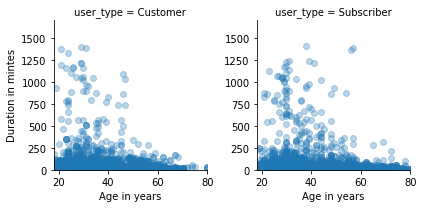

In [378]:
plot1 = sb.FacetGrid(data = df, col = 'user_type',xlim = [18, 80], ylim = [0, 1700])
plot1.map(plt.scatter, 'age', 'duration_minutes', alpha=0.3)
plot1.set_xlabels('Age in years')
plot1.set_ylabels('Duration in mintes')
plt.show()

The above plots shows the same age conslusion like that of the prev one.To add, subscribers show more users in larger age groups than that of customer as well as more point plots for longer duration trips. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> It has been proven that although men have done more high duration trips, females have done larger durations for the all age groups that are less than sixty.In addition the latest plot has shown that the reason why the avg of susbribers duration length is smaller in subscribers might be that there are more subscribers in the large age group , who is already proven to do trips smaller in durations.

### Were there any interesting or surprising interactions between features?

> The most surprising feature has been the distribution of genders that may make anyone claim that men can have higher strengths in trips regarding duration, women has actually shown better strength in that.

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!